In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\programdata\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df['koi_disposition'].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
X = selected_features = df.drop(columns=["koi_disposition"])

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
# Target Values
y = df['koi_disposition']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,stratify=y)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6743,0,1,0,0,1.721314,1.950000e-07,-1.950000e-07,132.531896,0.000094,-0.000094,...,-196,4.371,0.124,-0.186,1.073,0.316,-0.170,289.74515,45.187160,15.187
1510,0,0,1,0,1.087491,1.730000e-06,-1.730000e-06,131.770340,0.001370,-0.001370,...,-187,3.594,0.360,-0.120,3.204,0.594,-1.287,297.85938,40.326939,13.214
360,0,0,0,0,16.568068,5.230000e-05,-5.230000e-05,146.152850,0.002310,-0.002310,...,-80,4.602,0.024,-0.038,0.716,0.040,-0.032,292.46976,37.567791,15.391
5462,1,0,0,0,2.500128,4.010000e-05,-4.010000e-05,131.582900,0.018100,-0.018100,...,-227,4.120,0.172,-0.172,1.664,0.864,-0.411,295.38477,49.333672,11.270
5780,0,1,1,1,2.245721,2.340000e-05,-2.340000e-05,133.266780,0.009480,-0.009480,...,-214,4.455,0.052,-0.195,1.026,0.302,-0.108,292.69376,42.760899,14.244


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
from sklearn.preprocessing import MinMaxScaler  #importing MinMaxScaler, scaling data from [0-1]
def scale_minmax(X_values):
    return MinMaxScaler().fit(X_values)

In [11]:
# Scale your data
# creating the scaler
min_max_scaler = scale_minmax(X_train)

In [12]:
X_train_scaled = min_max_scaler.transform(X_train)
X_train_scaled

array([[0.        , 1.        , 0.        , ..., 0.45228515, 0.54193826,
        0.67947764],
       [0.        , 0.        , 1.        , ..., 0.82339645, 0.23052016,
        0.51640631],
       [0.        , 0.        , 0.        , ..., 0.57689754, 0.05372807,
        0.69633854],
       ...,
       [0.        , 0.        , 0.        , ..., 0.14483267, 0.67482771,
        0.63269692],
       [1.        , 0.        , 0.        , ..., 0.82602581, 0.65586148,
        0.63096124],
       [0.        , 1.        , 0.        , ..., 0.85826502, 0.31000442,
        0.65137615]])

In [13]:
# The same instance of the transformer can then be applied to some new test data unseen during the fit call:
# the same scaling and shifting operations will be applied to be consistent with the transformation performed on the 
# train data --> https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range
X_test_scaled = min_max_scaler.transform(X_test)
X_test_scaled

array([[0.        , 1.        , 0.        , ..., 0.47038649, 0.23002051,
        0.70311596],
       [0.        , 0.        , 0.        , ..., 0.5030053 , 0.92867177,
        0.72948178],
       [0.        , 0.        , 0.        , ..., 0.61723474, 0.75066098,
        0.62525829],
       ...,
       [0.        , 0.        , 0.        , ..., 0.6919557 , 0.38434666,
        0.55550045],
       [1.        , 0.        , 0.        , ..., 0.63295461, 0.1443941 ,
        0.19100752],
       [0.        , 0.        , 0.        , ..., 0.78722122, 0.64747716,
        0.55202909]])

# Train the Model



In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [15]:
#Fit (train) or model using the unscaled training data
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Validate the model using unscaled train and test data

In [16]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6341789052069426
Testing Data Score: 0.6270022883295194


### Using Scaled Data

In [17]:
model2 = LogisticRegression()
model2

LogisticRegression()

In [18]:
#Fit (train) or model using the scaled training data
model2.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Validate the model using the scaled data

In [19]:
train_score = model2.score(X_train_scaled, y_train)
test_score = model2.score(X_test_scaled, y_test)

In [20]:
print(f"Training Data Score: {train_score}")
print(f"Testing Data Score: {test_score}")

Training Data Score: 0.8506580202174328
Testing Data Score: 0.8535469107551488


<center> <h3 style="color:blue;"> Logistic Regression Feature Importance </h3> </center>

Feature: 0, Score: -3.79763
Feature: 1, Score: -2.32882
Feature: 2, Score: -3.04955
Feature: 3, Score: -2.66536
Feature: 4, Score: 1.19007
Feature: 5, Score: 0.54585
Feature: 6, Score: 0.18257
Feature: 7, Score: -0.36395
Feature: 8, Score: 2.43214
Feature: 9, Score: -1.70373
Feature: 10, Score: 0.26308
Feature: 11, Score: 0.92430
Feature: 12, Score: 0.63250
Feature: 13, Score: -2.25986
Feature: 14, Score: 2.90879
Feature: 15, Score: -2.18037
Feature: 16, Score: -0.47691
Feature: 17, Score: 0.01056
Feature: 18, Score: 0.71786
Feature: 19, Score: -0.01333
Feature: 20, Score: -0.01047
Feature: 21, Score: 0.74260
Feature: 22, Score: 1.55459
Feature: 23, Score: -0.02556
Feature: 24, Score: -0.00235
Feature: 25, Score: 0.75261
Feature: 26, Score: -1.86673
Feature: 27, Score: -0.37134
Feature: 28, Score: -0.65590
Feature: 29, Score: 0.99214
Feature: 30, Score: -0.53113
Feature: 31, Score: -0.64820
Feature: 32, Score: 0.08356
Feature: 33, Score: -0.50370
Feature: 34, Score: 0.15073
Feature: 35

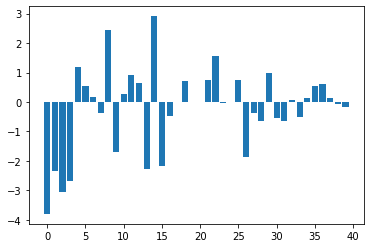

In [21]:
# Source https://machinelearningmastery.com/calculate-feature-importance-with-python/
importance = model2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<div style="height:auto;background-color:pink;border:2px solid;"> 
    <h2 style="text-align:center;color:orange;">NOTES:</h2>
    <ul> 
        <li>The Positive coeficients represent the features that make the final result to tend to 1</li> 
        <li>The Negative coeficientsrepresent the features that make the final result to tend to 0</li> 
    </ul>
</div>

In [22]:
from sklearn.feature_selection import SelectFromModel
# smf = SelectFromModel(model2, threshold=-np.inf, max_features=35)
# smf.fit(X_train_scaled, y_train)
# feature_idx = smf.get_support()
# feature_name = X.columns[feature_idx]
# feature_name

In [23]:
# X_train = X_train[feature_name.tolist()]
# X_test = X_test[feature_name.tolist()]
# X_train

In [24]:
# Re-scaling our data based on new dataset with less features
# min_max_scaler = scale_minmax(X_train)
# X_train_scaled = min_max_scaler.transform(X_train)
# X_test_scaled = min_max_scaler.transform(X_test)

### Ratraining Model with new Scaled data

In [25]:
# model2 = LogisticRegression()
# #Fit (train) or model using the scaled training data
# model2.fit(X_train_scaled, y_train)

### finding the best number of features to be used

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[(1, 0.5012397482357429),
 (2, 0.5798207133320618),
 (3, 0.7400343314896052),
 (4, 0.7512874308601946),
 (5, 0.822429906542056),
 (6, 0.8350181193972916),
 (7, 0.8388327293534236),
 (8, 0.8266259774938013),
 (9, 0.831012778943353),
 (10, 0.840549303833683),
 (11, 0.8470341407591074),
 (12, 0.8493229067327865),
 (13, 0.8493229067327865),
 (14, 0.850085828724013),
 (15, 0.8508487507152394),
 (16, 0.843410261300782),
 (17, 0.843410261300782),
 (18, 0.8432195308029754),
 (19, 0.8430288003051688),
 (20, 0.8436009917985886),
 (21, 0.843410261300782),
 (22, 0.843410261300782),
 (23, 0.844363913789815),
 (24, 0.8445546442876216),
 (25, 0.8422658783139424),
 (26, 0.8458897577722678),
 (27, 0.8451268357810414),
 (28, 0.8445546442876216),
 (29, 0.844363913789815),
 (30, 0.8466526797634942),
 (31, 0.8468434102613008),
 (32, 0.8458897577722678),
 (33, 0.8472248712569139),
 (34, 0.8514209422086592),
 (35, 0.8512302117108526),
 (36, 0.8502765592218196),
 (37, 0.8508487507152394),
 (38, 0.850658020217

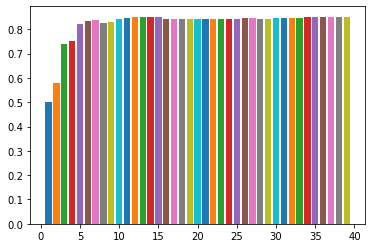

In [26]:
scores = []
def plot_features(n,model2):
    smf = SelectFromModel(model2, threshold=-np.inf, max_features=n)
    smf.fit(X_train_scaled, y_train)
    feature_idx = smf.get_support()
    feature_name = X.columns[feature_idx]
    X_train_ = X_train[feature_name.tolist()]
    X_test_ = X_test[feature_name.tolist()]
    min_max_scaler = scale_minmax(X_train_)
    X_train_scaled_ = min_max_scaler.transform(X_train_)
    X_test_scaled_ = min_max_scaler.transform(X_test_)
    model3 = LogisticRegression()
    #Fit (train) or model using the scaled training data
    model3.fit(X_train_scaled_, y_train)
    scores.append((n,model3.score(X_train_scaled_, y_train)))
    plt.bar(n, model3.score(X_train_scaled_, y_train))

for n in range(1,40):
    plot_features(n,model2)
scores

#### Validate the model using the scaled data

In [27]:
print(f"Model Validation utilizing {len(X_train.columns)} Features")
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Model Validation utilizing 40 Features
Training Data Score: 0.8506580202174328
Testing Data Score: 0.8535469107551488


<div style="height:auto;background-color:lightblue;border:2px solid;"> 
    <h2 style="text-align:center;">Model Validation with all the features</h2>
    <ul> 
        <li>Model Validation with all the original features 
            <ul>
                <li>Training Data Score: 0.8506580202174328</li>
                <li>Testing Data Score: 0.8535469107551488</li>
            </ul>
        </li> 
    </ul>
</div>

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [28]:
# Create the GridSearchCV model

In [29]:
# Train the model with GridSearch

In [30]:
print(grid2.best_params_)
print(grid2.best_score_)

NameError: name 'grid2' is not defined

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)